In [55]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

sns.set(style="whitegrid")

VGDB_PROJECT_DIR = Path(os.environ['VGDB_PROJECT_DIR'])

In [56]:

M_GAMES_BY_PLATFORM_PATH = VGDB_PROJECT_DIR / "data/processed/analytics/models/m_games_by_platform.parquet"
M_TOP_RATED_GAMES_PATH   = VGDB_PROJECT_DIR / "data/processed/analytics/models/m_top_rated_games.parquet"
M_GENRE_SUMMARY_PATH     = VGDB_PROJECT_DIR / "data/processed/analytics/models/m_genre_summary.parquet"

games_by_platform = pl.read_parquet(M_GAMES_BY_PLATFORM_PATH)
top_rated_games   = pl.read_parquet(M_TOP_RATED_GAMES_PATH)
genre_summary     = pl.read_parquet(M_GENRE_SUMMARY_PATH)

In [57]:
games_by_platform

platform_name,total_games,avg_rating,total_owners
str,u32,f64,i64
"""apple ii""",396,0.495253,6182
"""sega master system""",147,1.750816,5082
"""game boy advance""",849,1.411991,24085
"""xbox series s/x""",62,2.086774,41453
"""commodore / amiga""",1946,0.417795,28103
…,…,…,…
"""jaguar""",27,2.065185,2164
"""game gear""",140,1.877286,5103
"""sega 32x""",44,1.588409,456


In [58]:
top_rated_games

game_id,platform_id,released_date,release_year,rating,ratings_count,reviews_count,added_status_owned,added_status_playing,platform_name,rank
i64,u32,date,i32,f64,i64,i64,i64,i64,str,u32
1,32,2015-10-23,2015,0.0,2,4,88,0,"""pc""",1
1,24,2015-10-23,2015,0.0,2,4,88,0,"""macos""",1
1,50,2015-10-23,2015,0.0,2,4,88,0,"""xbox one""",1
1,36,2015-10-23,2015,0.0,2,4,88,0,"""playstation 4""",1
1,31,2015-10-23,2015,0.0,2,4,88,0,"""nintendo switch""",1
…,…,…,…,…,…,…,…,…,…,…
99994,32,2017-05-17,2017,0.0,0,0,0,0,"""pc""",1
99995,32,2016-03-04,2016,0.0,0,0,0,0,"""pc""",1
99997,32,2016-04-25,2016,0.0,0,0,0,0,"""pc""",1


In [59]:
genre_summary

genres,total_games,avg_rating
str,u32,f64
"""Action""",102028,0.183684
"""Indie""",33157,0.359677
"""Adventure""",72212,0.171698
"""Shooter""",31823,0.1225
"""Family""",5288,0.117742
…,…,…
"""Platformer""",48254,0.041364
"""Strategy""",33050,0.203019
"""Massively Multiplayer""",2289,0.484356


In [60]:
# Polars allows easy selection of columns
platforms = games_by_platform.select(["platform_name", "total_games"])

In [61]:
# Sort platforms by total_games descending
sorted_df = games_by_platform.sort(
    "total_games",
    descending=True
)

# Top 5 platforms
top5 = sorted_df.head(5)

# Aggregate the rest into "Other"
others = (
    sorted_df
    .slice(5)
    .select(pl.sum("total_games").alias("total_games"))
    .with_columns(pl.lit("Other").alias("platform_name"))
)

# Combine
pie_df = pl.concat([
    top5.select(["platform_name", "total_games"]),
    others.select(["platform_name", "total_games"])
])

In [62]:
pie_df

platform_name,total_games
str,u32
"""pc""",264360
"""web""",111546
"""ios""",67305
"""macos""",60000
"""linux""",41845
"""Other""",67406


In [63]:
labels = pie_df["platform_name"].to_list()
sizes  = pie_df["total_games"].to_list()

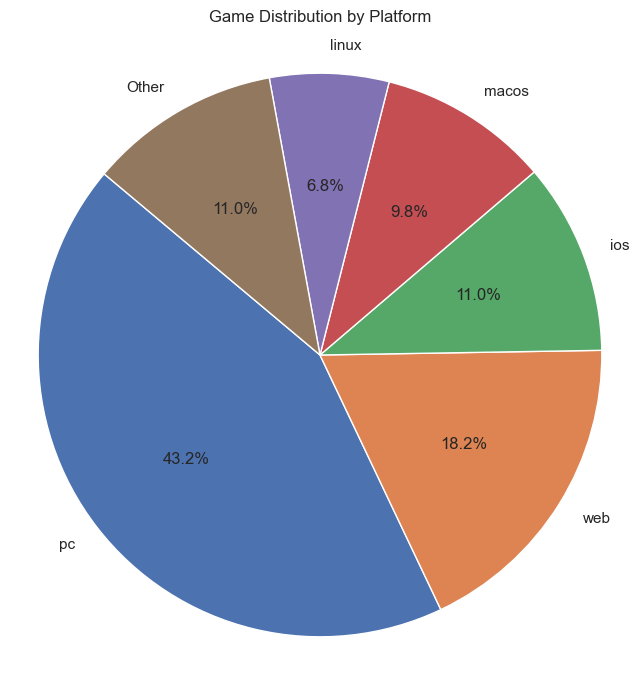

In [64]:
plt.figure(figsize=(8, 8))

plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Game Distribution by Platform\n")
plt.axis("equal")

plt.show()

In [65]:
FACT_GAME_METRICS_PATH = VGDB_PROJECT_DIR / "data/processed/analytics/fact_game_metrics.parquet"
fact = pl.read_parquet(FACT_GAME_METRICS_PATH)

In [66]:
print(fact.select("released_date").head())

shape: (5, 1)
┌───────────────┐
│ released_date │
│ ---           │
│ date          │
╞═══════════════╡
│ 2015-10-23    │
│ 2015-10-23    │
│ 2015-10-23    │
│ 2015-10-23    │
│ 2015-10-23    │
└───────────────┘


In [67]:
releases_by_year = (
    fact
    .filter(pl.col("released_date").is_not_null())
    .with_columns(
        pl.col("released_date").dt.year().alias("release_year")
    )
    .group_by("release_year")
    .agg(pl.count("game_id").alias("games_released"))
    .sort("release_year")
)

years = releases_by_year["release_year"].to_list()
counts = releases_by_year["games_released"].to_list()

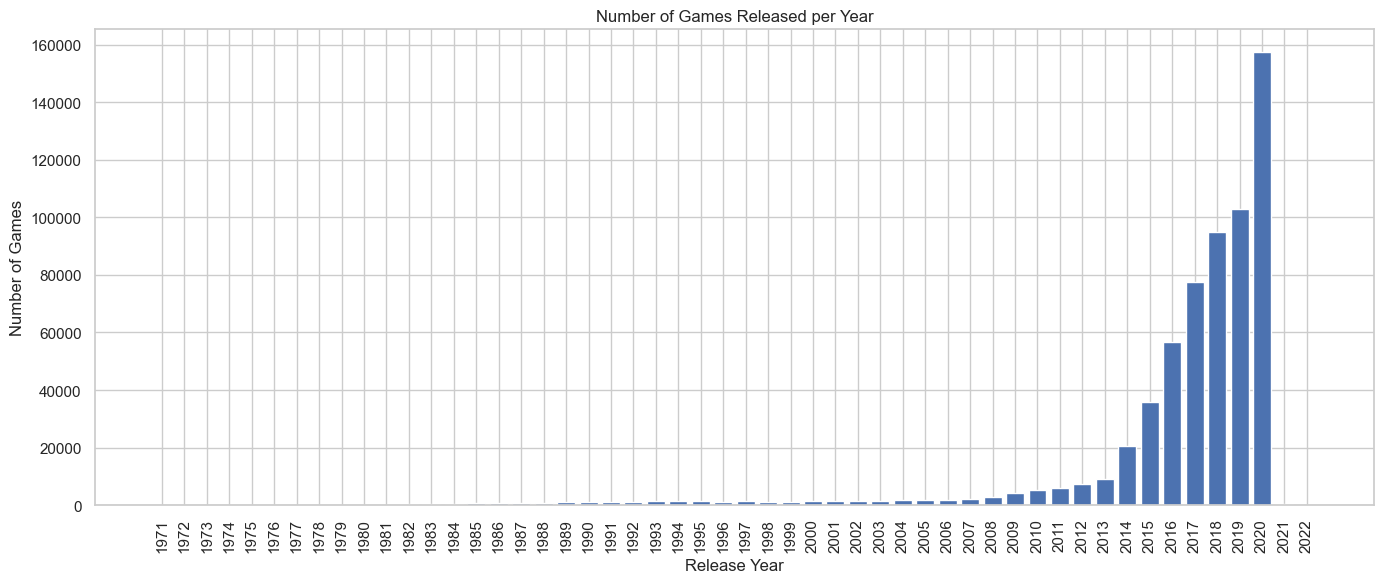

In [68]:
plt.figure(figsize=(14, 6))

plt.bar(
    years,
    counts,
    width=0.8,
    color="#4C72B0",
    align="center"
)

plt.title("Number of Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")

plt.xticks(years, rotation=90)

plt.tight_layout()
plt.show()


In [69]:

FACT_GAME_METRICS_PATH = VGDB_PROJECT_DIR / "data/processed/analytics/fact_game_metrics.parquet"
DIM_PLATFORM_PATH      = VGDB_PROJECT_DIR / "data/processed/analytics/dim_platform.parquet"

fact = pl.read_parquet(FACT_GAME_METRICS_PATH)
dim  = pl.read_parquet(DIM_PLATFORM_PATH)

df = (
    fact
    .join(dim, on="platform_id")
    .with_columns(
        pl.col("released_date").dt.year().alias("year")
    )
    .group_by(["year", "platform_name"])
    .agg(
        pl.len().alias("game_count")
    )
    .filter(pl.col("year").is_between(1988, 2022))
    .sort(["year", "game_count"], descending=[False, True])
)

TOP_N = 5

top_platforms = (
    df.group_by("platform_name")
      .agg(pl.sum("game_count").alias("total"))
      .sort("total", descending=True)
      .head(TOP_N)
      .select("platform_name")
)

df = (
    df.with_columns(
        pl.when(pl.col("platform_name").is_in(top_platforms["platform_name"].implode()))
        .then(pl.col("platform_name"))
        .otherwise(pl.lit("Other"))
        .alias("platform_group")
    )
    .group_by(["year", "platform_group"])
    .agg(pl.sum("game_count").alias("game_count"))
    .sort("year")
)

pivot = (
    df.pivot(
        values="game_count",
        index="year",
        on="platform_group",
        aggregate_function="sum"
    )
    .fill_null(0)
)

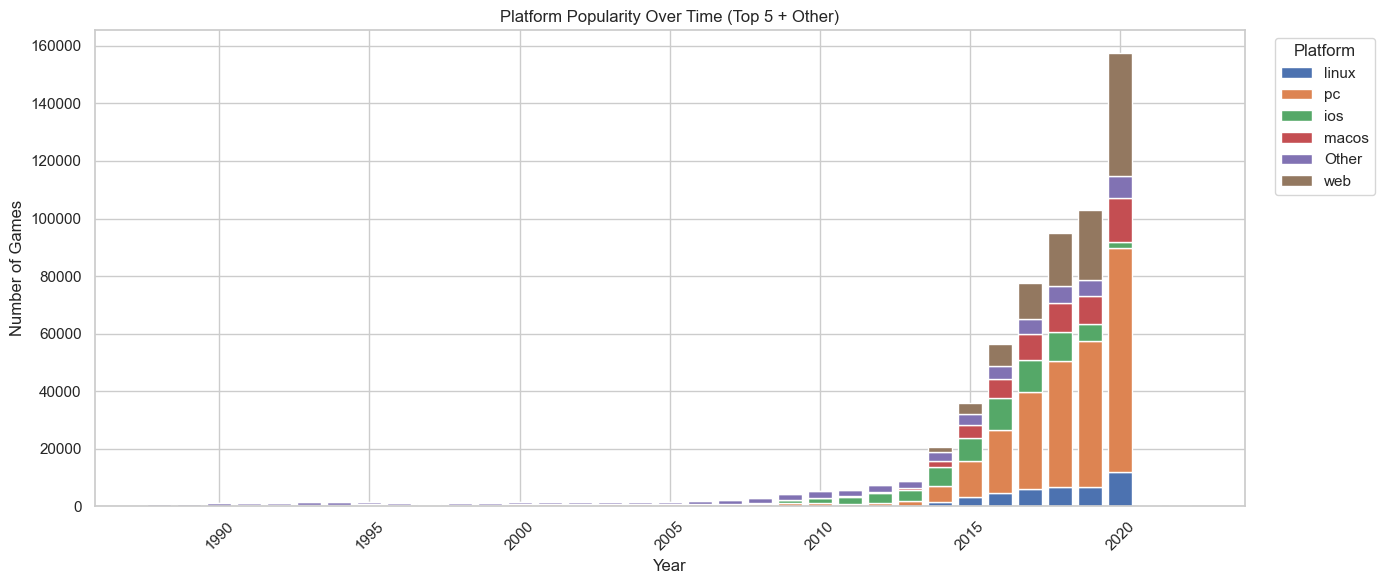

In [70]:
# Convert to NumPy (for plotting with Seaborn/Matplotlib)
pivot_data = pivot.to_numpy()

# Get column names for platforms
platforms = pivot.columns[1:]

# Plot with Seaborn
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 6))

# Stack bars by platform
bottom = None
for platform in platforms:
    ax.bar(pivot["year"], pivot[platform], label=platform, bottom=bottom)
    bottom = pivot[platform] if bottom is None else bottom + pivot[platform]

# Title and labels
ax.set_title("Platform Popularity Over Time (Top 5 + Other)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Games")
ax.legend(title="Platform", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
print(fact.select("release_year"))

shape: (612_462, 1)
┌──────────────┐
│ release_year │
│ ---          │
│ i32          │
╞══════════════╡
│ 2015         │
│ 2015         │
│ 2015         │
│ 2015         │
│ 2015         │
│ …            │
│ 2017         │
│ 2016         │
│ 2016         │
│ 2017         │
│ 2015         │
└──────────────┘


In [72]:
metrics_by_year = (
    fact
    .group_by("release_year")
    .agg(
        pl.col("ratings_count").sum().alias("total_ratings"),
        pl.col("reviews_count").sum().alias("total_reviews"),
        pl.col("added_status_owned").sum().alias("total_owned"),
        pl.col("added_status_playing").sum().alias("total_playing"),
    )
    .sort("release_year")
)

In [73]:
metrics_by_year

release_year,total_ratings,total_reviews,total_owned,total_playing
i32,i64,i64,i64,i64
1971,86,94,67,0
1972,104,120,52,0
1973,0,1,3,0
1974,1,2,4,0
1975,1,2,5,0
…,…,…,…,…
2018,198885,202623,869683,31092
2019,121214,123933,462557,22549
2020,39716,41244,245777,10941


In [74]:
from datetime import datetime
current_year = datetime.now().year

filtered = fact.filter(
    pl.col("release_year") > current_year
)

In [75]:
filtered

game_id,platform_id,released_date,release_year,rating,ratings_count,reviews_count,added_status_owned,added_status_playing
i64,u32,date,i32,f64,i64,i64,i64,i64
